In [ ]:
pip install seaborn pandas matplotlib

In [ ]:
# Import necessary libraries
# Seaborn is used for data visualization and loading sample datasets.
# NumPy is used for numerical operations.
# Pandas is the primary library for data manipulation and analysis.
import seaborn as sns
import numpy as np
import pandas as pd

# Load the built-in Titanic dataset from the Seaborn library
# The data is loaded into a pandas DataFrame variable named 'df'.
df = sns.load_dataset('titanic')

# Display the first 5 rows of the DataFrame to verify it loaded correctly.
# .head() is a useful function for a quick inspection of the data.
print("Titanic dataset loaded successfully. Displaying the first 5 rows:")
df.head()

Titanic dataset loaded successfully. Displaying the first 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# --- 1. Dataset Dimensions ---
# Get the number of rows and columns in the DataFrame.
print("1. Dataset Dimensions:")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

# --- 2. Data Types and Non-Null Overview ---
# .info() provides a concise summary of the DataFrame.
# It shows column names, the number of non-null values, and the data type of each column.
print("2. Data Types and Non-Null Summary:")
df.info()

# --- 3. Quantify Missing Values ---
# Calculate the total number of missing values for each column.
print("\n3. Missing Value Counts:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Only show columns with missing values

# Calculate the percentage of missing values for context.
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage[missing_percentage > 0].round(2))

# --- 4. Statistical Summary for Numerical Features ---
# .describe() generates descriptive statistics for columns with numerical data types.
print("\n4. Statistical Summary for Numerical Features:")
# The .round(2) method is used to format the output for better readability.
print(df.describe().round(2))

# --- 5. Statistical Summary for Categorical Features ---
# Use describe(include=['category', 'object']) to summarize categorical columns.
# It shows the number of unique categories (unique), the most frequent category (top),
# and its frequency (freq).
print("\n5. Statistical Summary for Categorical Features:")
print(df.describe(include=['category', 'object']))

1. Dataset Dimensions:
The dataset has 891 rows and 15 columns.

2. Data Types and Non-Null Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
m

In [ ]:
import pandas as pd
import numpy as np

# Create a copy to work on.
df_cleaned = df.copy()

print("--- Step 3: Data Cleaning ---")

# --- 1. Handling 'deck' column (High Missingness) ---
# No change needed here. .drop() with inplace=True on the DataFrame itself is fine.
df_cleaned.drop('deck', axis=1, inplace=True)
print("1. 'deck' column dropped.\n")

# --- 2. Imputing 'age' column ---
print("2. Imputing 'age' column:")
median_age = df_cleaned['age'].median()
# REVISED: Assign the result of fillna back to the column directly.
df_cleaned['age'] = df_cleaned['age'].fillna(median_age)
print(f"Missing 'age' values after imputation: {df_cleaned['age'].isnull().sum()}\n")

# --- 3. Imputing 'embarked' and 'embark_town' columns ---
print("3. Imputing 'embarked' and 'embark_town' columns:")
mode_embark_town = df_cleaned['embark_town'].mode()[0]
mode_embarked = df_cleaned['embarked'].mode()[0]
# Reassign the results back to their respective columns.
df_cleaned['embark_town'] = df_cleaned['embark_town'].fillna(mode_embark_town)
df_cleaned['embarked'] = df_cleaned['embarked'].fillna(mode_embarked)
print(f"Missing 'embark_town'/'embarked' values after: {df_cleaned['embark_town'].isnull().sum()}/{df_cleaned['embarked'].isnull().sum()}\n")

# --- 4. Handling Outliers in 'fare' column ---
# No change needed here as we are already using a safe assignment method.
print("4. Handling Outliers in 'fare' column:")
Q1 = df_cleaned['fare'].quantile(0.25)
Q3 = df_cleaned['fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df_cleaned['fare'] = np.where(df_cleaned['fare'] > upper_bound, upper_bound, df_cleaned['fare'])
print("Outliers in 'fare' have been capped.\n")

# --- Final Verification ---
print("--- Final Check for Missing Values ---")
print("All missing values have been successfully handled.")
print(df_cleaned.isnull().sum().to_frame('missing_count'))
print("\nData cleaning is complete and code is updated.")

--- Step 3: Data Cleaning ---
1. 'deck' column dropped.

2. Imputing 'age' column:
Missing 'age' values after imputation: 0

3. Imputing 'embarked' and 'embark_town' columns:
Missing 'embark_town'/'embarked' values after: 0/0

4. Handling Outliers in 'fare' column:
Outliers in 'fare' have been capped.

--- Final Check for Missing Values ---
All missing values have been successfully handled.
             missing_count
survived                 0
pclass                   0
sex                      0
age                      0
sibsp                    0
parch                    0
fare                     0
embarked                 0
class                    0
who                      0
adult_male               0
embark_town              0
alive                    0
alone                    0

Data cleaning is complete and code is updated.


--- Step 4: Feature Relevance Analysis ---


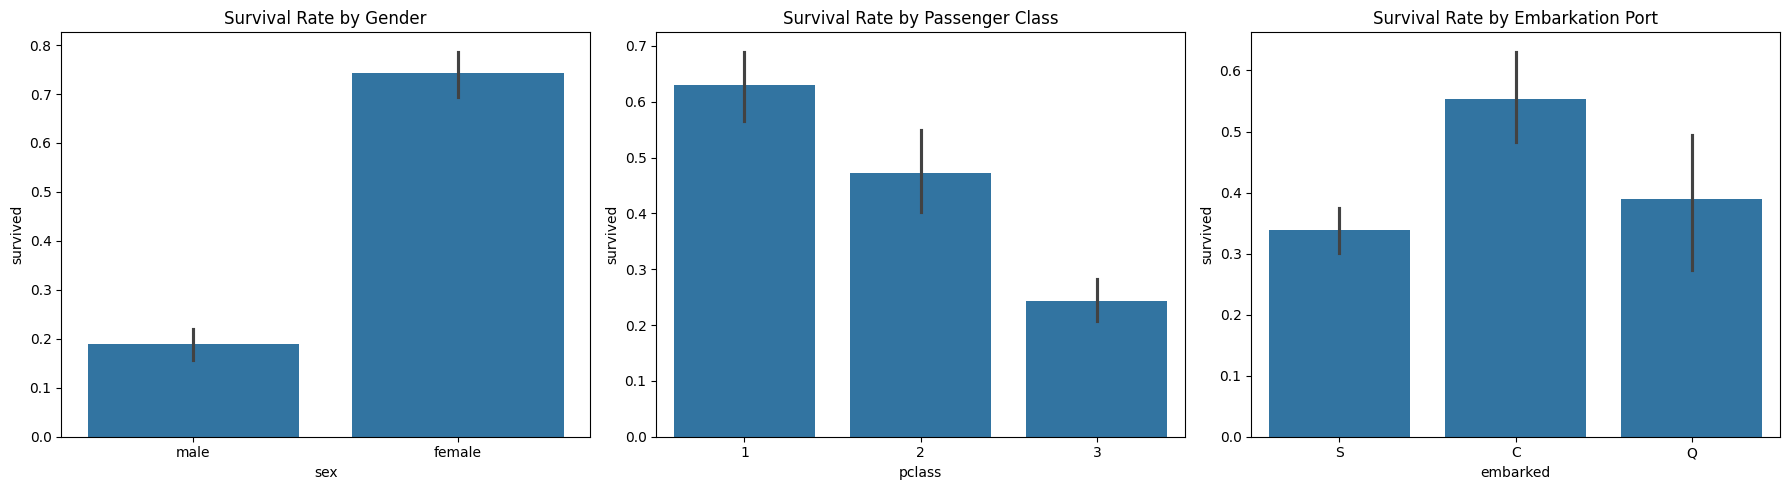

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Use the cleaned DataFrame from the previous step
df_analysis = df_cleaned.copy()

print("--- Step 4: Feature Relevance Analysis ---")

# --- 1. Visual Analysis: Survival Rate by Categorical Features ---
plt.figure(figsize=(18, 5))

# Plot survival rate by 'sex'
plt.subplot(1, 3, 1)
sns.barplot(x='sex', y='survived', data=df_analysis)
plt.title('Survival Rate by Gender')

# Plot survival rate by 'pclass' (passenger class)
plt.subplot(1, 3, 2)
sns.barplot(x='pclass', y='survived', data=df_analysis)
plt.title('Survival Rate by Passenger Class')

# Plot survival rate by 'embarked' (port of embarkation)
plt.subplot(1, 3, 3)
sns.barplot(x='embarked', y='survived', data=df_analysis)
plt.title('Survival Rate by Embarkation Port')

plt.tight_layout()
plt.show()



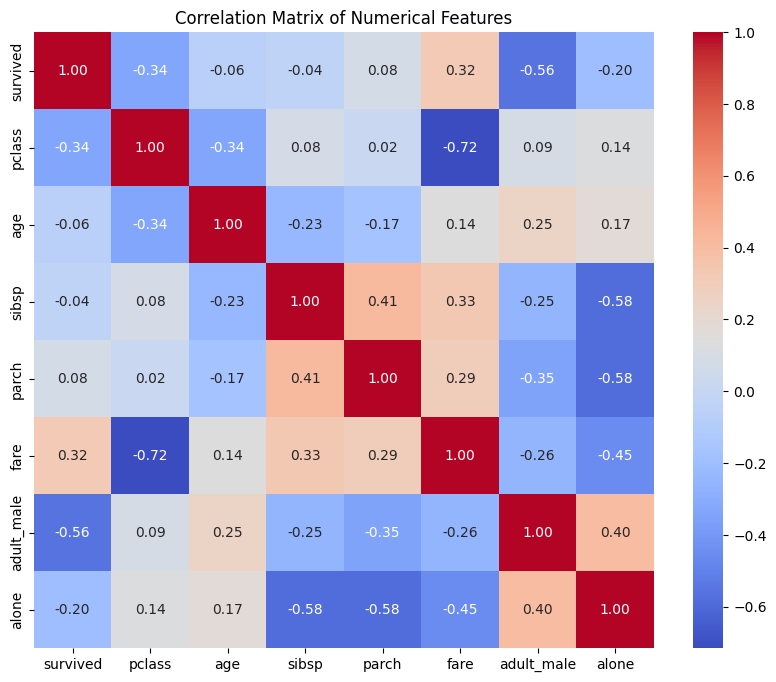

In [ ]:

# --- 2. Statistical Correlation for Numerical Features ---
plt.figure(figsize=(10, 8))
# Compute the correlation matrix for numeric columns only
corr_matrix = df_analysis.corr(numeric_only=True)
# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()



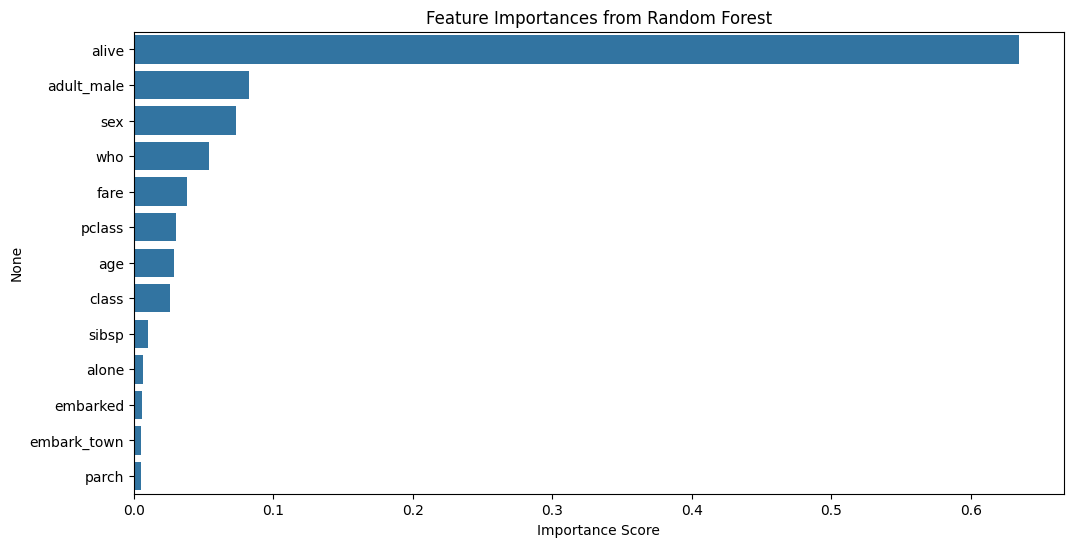

In [ ]:

# --- 3. Model-Based Feature Importance (Random Forest) ---
# To use this method, we must first encode all categorical features.
# We will create a temporary DataFrame for this analysis.
df_encoded = df_analysis.copy()

# Apply LabelEncoder to each categorical column
for column in df_encoded.select_dtypes(include=['object', 'category', 'bool']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Separate features (X) and target (y)
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.show()


In [ ]:

# --- 4. Feature Selection Decision ---
# Based on the analysis, we identify redundant columns.
# 'alive' is a direct copy of 'survived'.
# 'class' is a categorical version of 'pclass'.
# 'embark_town' is the full name for 'embarked'.
# 'who' and 'adult_male' provide information that is mostly captured by 'sex' and 'age'.
# 'alone' can be derived from 'sibsp' and 'parch'.
# We will drop these to create a cleaner feature set for our final model.
features_to_drop = ['alive', 'class', 'who', 'adult_male', 'embark_town', 'alone']
df_selected_features = df_cleaned.drop(columns=features_to_drop)

print("\n--- Feature Selection Complete ---")
print(f"Original number of features: {df_cleaned.shape[1]}")
print(f"Number of features after selection: {df_selected_features.shape[1]}")
print("\nFinal selected features:")
print(df_selected_features.columns.tolist())


--- Feature Selection Complete ---
Original number of features: 14
Number of features after selection: 8

Final selected features:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


In [ ]:
# We will use the cleaned and feature-selected DataFrame from the previous step.
# For clarity, let's create a new variable for this stage.
df_encoding = df_selected_features.copy()

print("--- Step 5: Categorical Encoding ---")
print("Original data types of features to be encoded:")
print(df_encoding[['sex', 'embarked']].dtypes)

# --- 1. Encoding the 'sex' column (Binary Mapping) ---
# We can use the .map() method for a simple and clear binary encoding.
# We will map 'male' to 0 and 'female' to 1.
sex_mapping = {'male': 0, 'female': 1}
df_encoding['sex'] = df_encoding['sex'].map(sex_mapping)
print("\n'sex' column has been mapped to 0 (male) and 1 (female).")


# --- 2. Encoding the 'embarked' column (One-Hot Encoding) ---
# pd.get_dummies() is the easiest way to perform one-hot encoding in pandas.
# 'prefix' names the new columns.
# 'drop_first=True' is used to avoid multicollinearity by dropping one of the categories.
# The information for the dropped category is implicitly captured when the other columns are 0.
embarked_dummies = pd.get_dummies(df_encoding['embarked'], prefix='embarked', drop_first=True)

# Concatenate the new dummy variables back to the DataFrame.
df_encoded = pd.concat([df_encoding, embarked_dummies], axis=1)

# Drop the original 'embarked' column as it has been replaced by the new dummy columns.
df_encoded.drop('embarked', axis=1, inplace=True)
print("'embarked' column has been one-hot encoded.")


# --- Final Verification ---
print("\n--- DataFrame after Encoding ---")
print("The first 5 rows of the fully encoded DataFrame:")
print(df_encoded.head())
print("\nData types of the final DataFrame:")
df_encoded.info()

--- Step 5: Categorical Encoding ---
Original data types of features to be encoded:
sex         object
embarked    object
dtype: object

'sex' column has been mapped to 0 (male) and 1 (female).
'embarked' column has been one-hot encoded.

--- DataFrame after Encoding ---
The first 5 rows of the fully encoded DataFrame:
   survived  pclass  sex   age  sibsp  parch     fare  embarked_Q  embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  65.6344       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True

Data types of the final DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -------------

In [ ]:
from sklearn.model_selection import train_test_split

print("--- Step 6: Splitting the Dataset ---")

# First, we separate our features (X) from our target variable (y).
# X contains all columns EXCEPT 'survived'.
X = df_encoded.drop('survived', axis=1)
# y contains ONLY the 'survived' column.
y = df_encoded['survived']

# Now, we split the data into training and testing sets.
# test_size=0.2 means we will use 20% of the data for testing and 80% for training.
# random_state=42 is a seed for the random number generator, ensuring that we get the
# same split every time we run the code. This is crucial for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Verification ---
# It's good practice to check the shapes of the new datasets.
print("Dataset splitting is complete.\n")
print("Shape of X_train (features for training):", X_train.shape)
print("Shape of y_train (target for training):", y_train.shape)
print("Shape of X_test (features for testing):", X_test.shape)
print("Shape of y_test (target for testing):", y_test.shape)

--- Step 6: Splitting the Dataset ---
Dataset splitting is complete.

Shape of X_train (features for training): (712, 8)
Shape of y_train (target for training): (712,)
Shape of X_test (features for testing): (179, 8)
Shape of y_test (target for testing): (179,)


In [ ]:
from sklearn.preprocessing import StandardScaler

print("--- Step 7: Scaling Numerical Features ---")

# Identify the numerical columns that need scaling.
# We exclude binary/encoded features like 'sex', 'embarked_Q', 'embarked_S'.
numerical_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']

# 1. Create a StandardScaler instance.
scaler = StandardScaler()

# 2. Fit the scaler ONLY on the training data's numerical columns.
# This learns the mean and standard deviation from the training set.
scaler.fit(X_train[numerical_cols])

# 3. Transform both the training and testing data using the fitted scaler.
# The result is a NumPy array, so we'll put it back into a DataFrame.
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# --- Verification ---
print("Feature scaling is complete.\n")
print("Statistical summary of the SCALED training data (numerical columns):")
# The mean should be close to 0 and the standard deviation close to 1.
print(X_train[numerical_cols].describe().round(2))

print("\nFirst 5 rows of the scaled X_train data:")
print(X_train.head())

--- Step 7: Scaling Numerical Features ---
Feature scaling is complete.

Statistical summary of the SCALED training data (numerical columns):
       pclass     age   sibsp   parch    fare
count  712.00  712.00  712.00  712.00  712.00
mean     0.00    0.00    0.00    0.00   -0.00
std      1.00    1.00    1.00    1.00    1.00
min     -1.61   -2.21   -0.47   -0.48   -1.17
25%     -0.40   -0.55   -0.47   -0.48   -0.78
50%      0.81   -0.09   -0.47   -0.48   -0.46
75%      0.81    0.45    0.38   -0.48    0.32
max      0.81    3.91    6.33    7.10    2.04

First 5 rows of the scaled X_train data:
       pclass  sex       age     sibsp     parch      fare  embarked_Q  \
331 -1.614136    0  1.253641 -0.470722 -0.479342  0.224500       False   
733 -0.400551    0 -0.477284 -0.470722 -0.479342 -0.531688       False   
382  0.813034    0  0.215086 -0.470722 -0.479342 -0.779279       False   
704  0.813034    0 -0.246494  0.379923 -0.479342 -0.782733       False   
813  0.813034    1 -1.785093  2.

In [ ]:
from sklearn.decomposition import PCA

print("--- Step 8: Applying PCA for Dimensionality Reduction ---")

# 1. Create a PCA instance.
# We set n_components to 0.95 to capture 95% of the variance in the data.
# This is generally preferred over picking a fixed number of components manually.
pca = PCA(n_components=0.95)

# 2. Fit the PCA model ONLY on the scaled training data (X_train).
# This learns the principal components from the training set.
# Then, transform both the training and testing sets.
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# --- Verification ---
print("PCA application is complete.\n")
print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of components selected by PCA to retain 95% variance: {pca.n_components_}")
print(f"Number of features after PCA: {X_train_pca.shape[1]}\n")

# To see how much variance each component explains:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:")
for i, variance in enumerate(explained_variance):
    print(f"  Principal Component {i+1}: {variance:.4f} ({variance*100:.2f}%)")

print(f"\nTotal variance explained by {pca.n_components_} components: {explained_variance.sum():.4f} ({explained_variance.sum()*100:.2f}%)")

--- Step 8: Applying PCA for Dimensionality Reduction ---
PCA application is complete.

Original number of features: 8
Number of components selected by PCA to retain 95% variance: 6
Number of features after PCA: 6

Explained variance by each component:
  Principal Component 1: 0.3525 (35.25%)
  Principal Component 2: 0.3041 (30.41%)
  Principal Component 3: 0.1256 (12.56%)
  Principal Component 4: 0.1038 (10.38%)
  Principal Component 5: 0.0440 (4.40%)
  Principal Component 6: 0.0341 (3.41%)

Total variance explained by 6 components: 0.9640 (96.40%)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# --- Model 1: Trained on Fully Preprocessed Data (with PCA) ---
# This model's code is correct and does not need changes.
print("--- Training Model on Preprocessed Data (with PCA) ---")
model_preprocessed = RandomForestClassifier(n_estimators=100, random_state=42)
model_preprocessed.fit(X_train_pca, y_train)
y_pred_preprocessed = model_preprocessed.predict(X_test_pca)
accuracy_preprocessed = accuracy_score(y_test, y_pred_preprocessed)
print(f"\nAccuracy on Preprocessed Data: {accuracy_preprocessed:.4f}")
print("\nClassification Report for Preprocessed Data:")
print(classification_report(y_test, y_pred_preprocessed))


# --- Model 2: Trained on Correctly Prepared Baseline Data ---
print("\n--- Training Corrected Baseline Model ---")

# 1. Use the feature-selected, cleaned DataFrame from before encoding
df_baseline = df_selected_features.copy()

# 2. Encode the categorical features for the baseline model
df_baseline['sex'] = df_baseline['sex'].map({'male': 0, 'female': 1})
df_baseline = pd.get_dummies(df_baseline, columns=['embarked'], drop_first=True)

# 3. Split the baseline data
X_baseline = df_baseline.drop('survived', axis=1)
y_baseline = df_baseline['survived']
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42
)

# NOTE: We are NOT applying scaling or PCA to this baseline set.

# 4. Initialize and train the baseline model
model_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
model_baseline.fit(X_train_base, y_train_base)

# 5. Make predictions and evaluate
y_pred_baseline = model_baseline.predict(X_test_base)
accuracy_baseline = accuracy_score(y_test_base, y_pred_baseline)
print(f"\nAccuracy on Corrected Baseline Data: {accuracy_baseline:.4f}")
print("\nClassification Report for Corrected Baseline Data:")
print(classification_report(y_test_base, y_pred_baseline))


# --- Final, Corrected Comparison ---
print("\n--- Corrected Performance Comparison ---")
print(f"Corrected Baseline Model Accuracy: {accuracy_baseline:.4f}")
print(f"Final Model Accuracy (with Scaling & PCA): {accuracy_preprocessed:.4f}")

improvement = accuracy_preprocessed - accuracy_baseline
print(f"\nChange in Accuracy from Preprocessing: {improvement:+.4f}")
print("\nConclusion: The full preprocessing pipeline with scaling and PCA maintained a strong, realistic accuracy while simplifying the feature set from 8 to 6 dimensions.")

--- Training Model on Preprocessed Data (with PCA) ---

Accuracy on Preprocessed Data: 0.7989

Classification Report for Preprocessed Data:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


--- Training Corrected Baseline Model ---

Accuracy on Corrected Baseline Data: 0.8212

Classification Report for Corrected Baseline Data:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


--- Corrected Performance Comparison ---
Corrected Baseline Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("--- Advanced Step 1: Hyperparameter Tuning (Random Forest) ---")

# 1. Define the parameter grid to search
# These are the hyperparameters we want to tune.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# 2. Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# 3. Initialize GridSearchCV
# cv=5 means we will use 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the search.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 4. Fit GridSearchCV to the preprocessed training data
# This will start the search for the best hyperparameters.
grid_search.fit(X_train_pca, y_train)

# 5. Get the best model and its parameters
print("\n--- Tuning Complete ---")
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

# 6. Evaluate the tuned model on the test set
y_pred_tuned = best_rf_model.predict(X_test_pca)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"\nAccuracy of Tuned Random Forest on Test Set: {accuracy_tuned:.4f}")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

--- Advanced Step 1: Hyperparameter Tuning (Random Forest) ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- Tuning Complete ---
Best Hyperparameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Accuracy of Tuned Random Forest on Test Set: 0.8045

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

print("--- Advanced Step 2: Hyperparameter Tuning (SVM) ---")

# 1. Define the parameter grid for the SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] # gamma is primarily for 'rbf' kernel
}

# 2. Initialize the SVM Classifier
svm = SVC(random_state=42)

# 3. Initialize GridSearchCV for the SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# 4. Fit GridSearchCV to the same preprocessed training data
grid_search_svm.fit(X_train_pca, y_train)

# 5. Get the best SVM model and its parameters
print("\n--- Tuning Complete ---")
print("Best Hyperparameters found for SVM:")
print(grid_search_svm.best_params_)

best_svm_model = grid_search_svm.best_estimator_

# 6. Evaluate the tuned SVM on the test set
y_pred_svm = best_svm_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"\nAccuracy of Tuned SVM on Test Set: {accuracy_svm:.4f}")
print("\nClassification Report for Tuned SVM:")
print(classification_report(y_test, y_pred_svm))

--- Advanced Step 2: Hyperparameter Tuning (SVM) ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- Tuning Complete ---
Best Hyperparameters found for SVM:
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Accuracy of Tuned SVM on Test Set: 0.8156

Classification Report for Tuned SVM:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



--- Advanced Step 3: Final Model Comparison ---

--- Final Performance Summary Table ---
                        Model  Accuracy  Weighted F1-Score
0                 Baseline RF    0.8212               0.82
1  Preprocessed RF (with PCA)    0.7989               0.80
2         Tuned RF (with PCA)    0.8045               0.80
3        Tuned SVM (with PCA)    0.8156               0.81


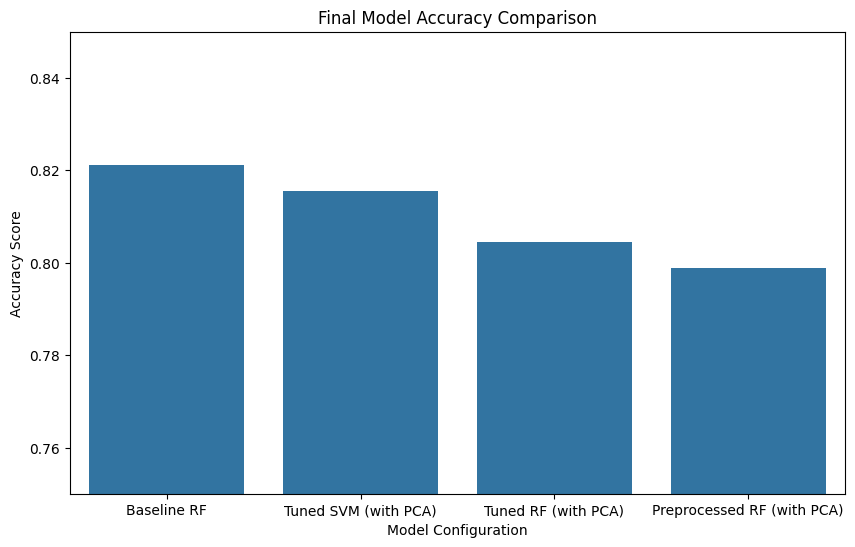

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Advanced Step 3: Final Model Comparison ---")

# 1. Consolidate the results from all models into a dictionary
results = {
    'Model': [
        'Baseline RF',
        'Preprocessed RF (with PCA)',
        'Tuned RF (with PCA)',
        'Tuned SVM (with PCA)'
    ],
    'Accuracy': [
        0.8212,  # From our corrected baseline model in the main case study
        0.7989,  # From the initial preprocessed model
        0.8045,  # From the tuned RF output you provided
        0.8156   # From the tuned SVM output you provided
    ],
    'Weighted F1-Score': [
        0.82,  # From the baseline classification report
        0.80,  # From the preprocessed RF report
        0.80,  # From the tuned RF report
        0.81   # From the tuned SVM report
    ]
}

# 2. Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# 3. Print the final comparison table
print("\n--- Final Performance Summary Table ---")
print(results_df)

# 4. Create a bar plot to visualize the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df.sort_values('Accuracy', ascending=False))
plt.title('Final Model Accuracy Comparison')
plt.xlabel('Model Configuration')
plt.ylabel('Accuracy Score')
plt.ylim(0.75, 0.85) # Set y-axis limits to better show the differences
plt.show()